In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

In [ ]:
!ls german-traffic-signs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [5]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(34799,)
(4410,)
(12630,)


In [6]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_val.shape[0] == y_val.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1:] == (32,32,3))
assert(X_val.shape[1:] == (32,32,3))
assert(X_test.shape[1:] == (32,32,3))

In [7]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


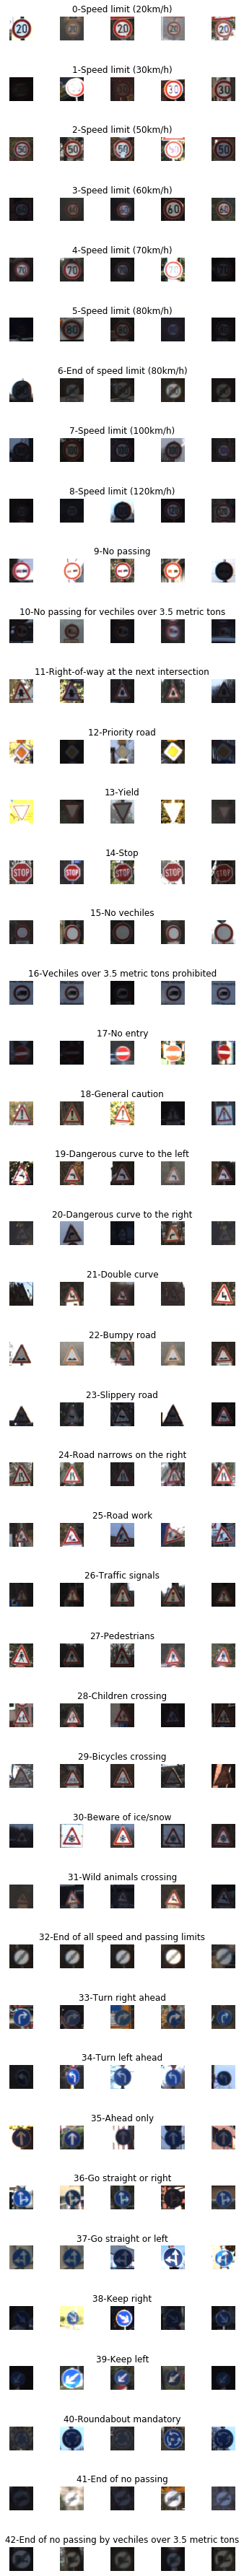

In [8]:
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

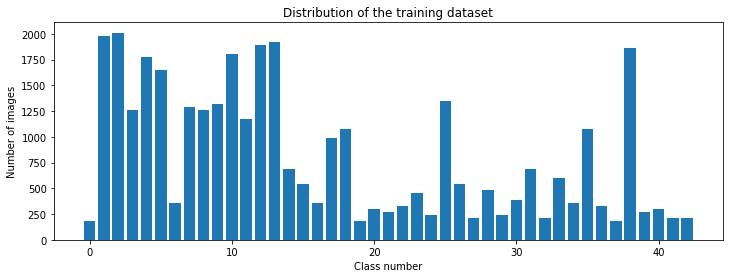

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

Shape:  (32, 32, 3)
Label:  36


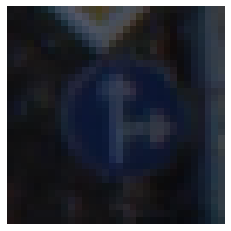

In [10]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print('Shape: ', X_train[1000].shape)
print('Label: ', y_train[1000])

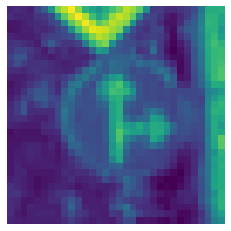

Shape:  (32, 32)


In [11]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
plt.show()
print('Shape: ', img.shape)

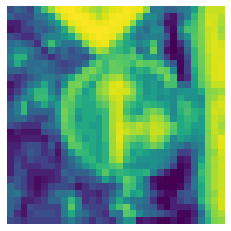

Shape:  (32, 32)


In [12]:
# brightness equalization
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img)
plt.axis('off')
plt.show()
print('Shape: ', img.shape)

In [13]:
def preprocessing(img):
    img = equalize(grayscale(img))
    img = img / 255.0
    return img

In [14]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

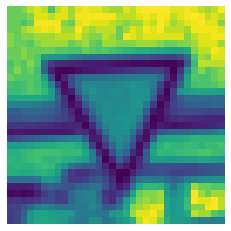

(34799, 32, 32)


In [15]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
plt.show()
print(X_train.shape)

In [16]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=.1,
                  height_shift_range=.1,
                  zoom_range=.2,
                  shear_range=.1,
                  rotation_range=10)
datagen.fit(X_train)

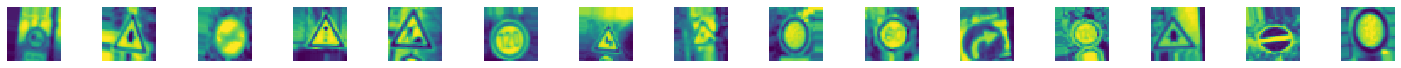

In [18]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis('off')

In [19]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [20]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [21]:
def my_model():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu'))
    model.add(Conv2D(60, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.5))
    
    model.add(Flatten())
    model.add(Dense(units=500, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(units=43, activation='softmax'))
    
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [22]:
model = my_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [24]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 39s 20ms/step - loss: 1.3056 - accuracy: 0.6142 - val_loss: 0.1358 - val_accuracy: 0.9603
Epoch 2/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.4231 - accuracy: 0.8666 - val_loss: 0.0756 - val_accuracy: 0.9755
Epoch 3/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.2911 - accuracy: 0.9096 - val_loss: 0.0544 - val_accuracy: 0.9812
Epoch 4/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.2366 - accuracy: 0.9260 - val_loss: 0.0589 - val_accuracy: 0.9832
Epoch 5/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.2054 - accuracy: 0.9369 - val_loss: 0.0379 - val_accuracy: 0.9882
Epoch 6/10
2000/2000 [==============================] - 33s 16ms/step - loss: 0.1794 - accuracy: 0.9454 - val_loss: 0.0329 - val_accuracy: 0.9884
Epoch 7/10
2000/2000 [==============================] - 33s 16ms/step - loss: 0.1640 - accuracy: 0.9498 - val_loss: 0.0311 -

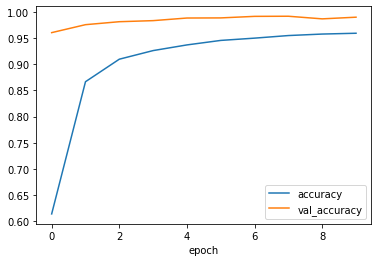

In [25]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('epoch')
plt.show()

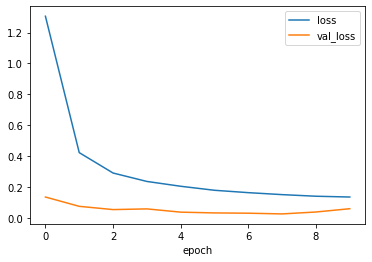

In [26]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('epoch')
plt.show()

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.10154783339407873
Test Accuracy:  0.9712588787078857


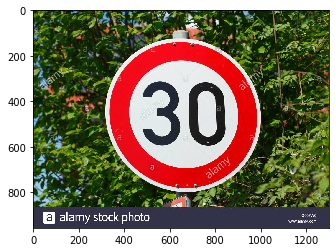

In [28]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(956, 1300, 3)
(32, 32)


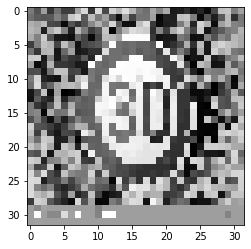

In [29]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [30]:
img = img.reshape(1, 32, 32, 1)

In [31]:
def model_prediction(pred):
    return data['SignName'][pred]

In [32]:
print('Model\'s prediction:', model_prediction(model.predict_classes(img)))

Model's prediction: 1    Speed limit (30km/h)
Name: SignName, dtype: object


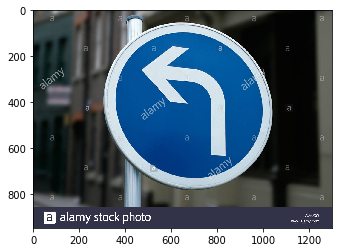

In [33]:
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(946, 1300, 3)
(32, 32)


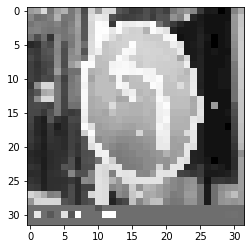

In [34]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [35]:
img = img.reshape(1, 32, 32, 1)

In [36]:
print('Model\'s prediction:', model_prediction(model.predict_classes(img)))

Model's prediction: 34    Turn left ahead
Name: SignName, dtype: object
